# Load Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Load datasets

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/data/riyaz_project/train.csv' , sep = ';')
test_df = pd.read_csv('/content/drive/MyDrive/data/riyaz_project/test.csv' , sep = ';')

In [3]:
test_df.shape

(4521, 17)

In [ ]:
train_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df = train_df

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Exploratory Data Analysis

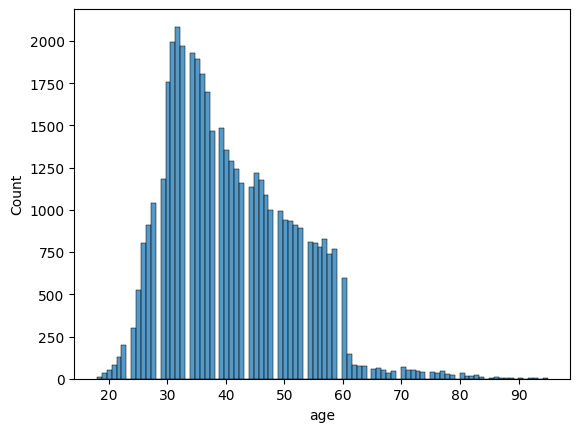

In [12]:
#Age
sns.histplot(df["age"]  )
plt.show()

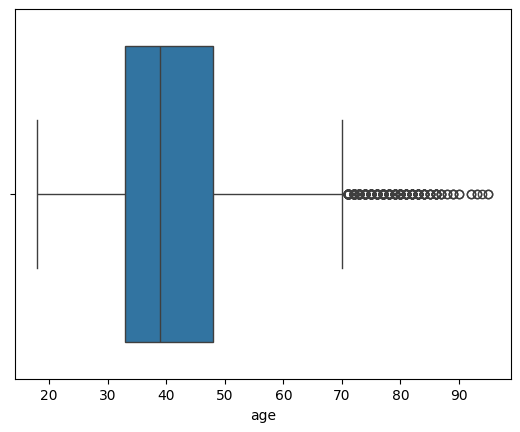

In [10]:
sns.boxplot(df["age"] , orient = "h")
plt.show()

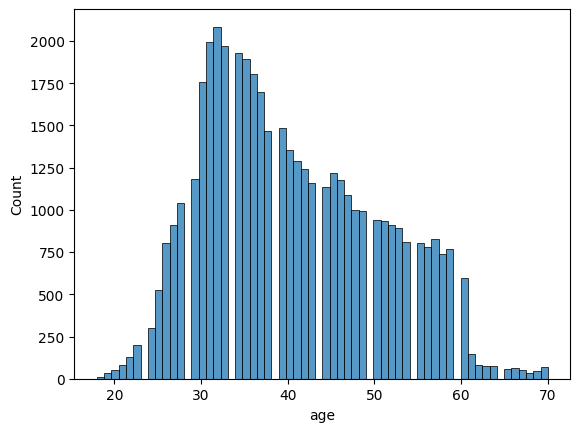

In [5]:
new_age = df["age"][df["age"]<= 70]
sns.histplot(new_age )
plt.show()

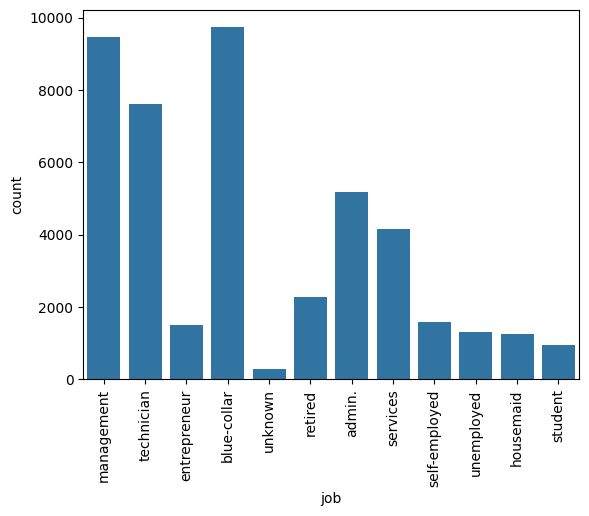

In [17]:
#job

sns.countplot(df, x="job")
plt.xticks(rotation= 90 )
plt.show()

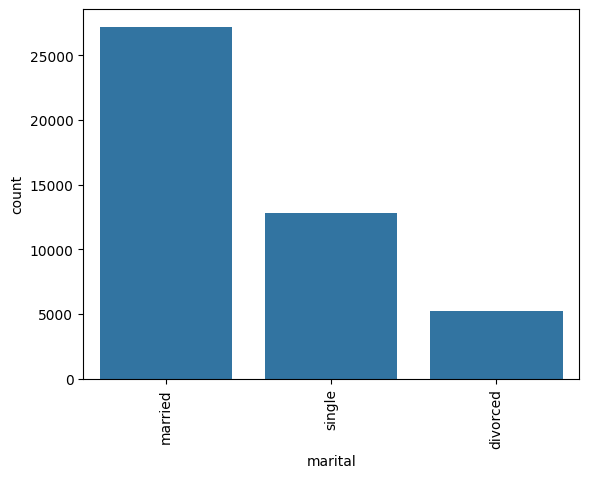

In [18]:
#Marital

sns.countplot(df , x = "marital")
plt.xticks(rotation = 90)
plt.show()

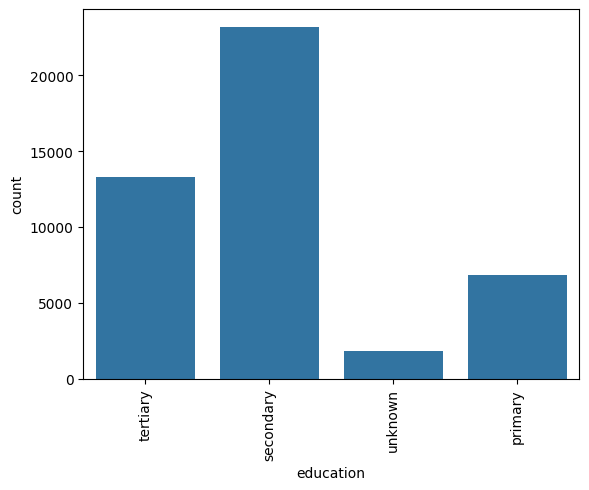

In [19]:
#Education

sns.countplot(df , x = "education")
plt.xticks(rotation = 90)
plt.show()

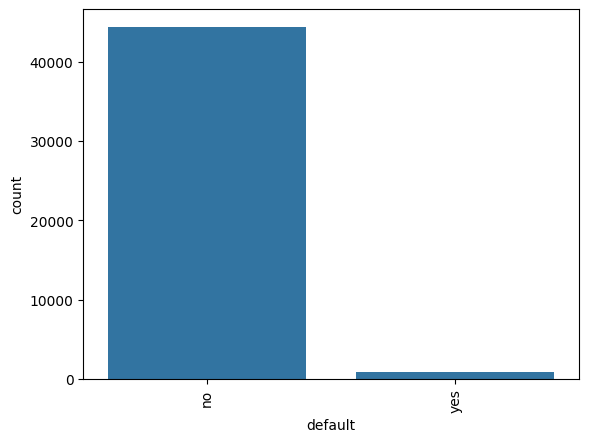

In [20]:
#Default

sns.countplot(df , x = "default")
plt.xticks(rotation = 90)
plt.show()

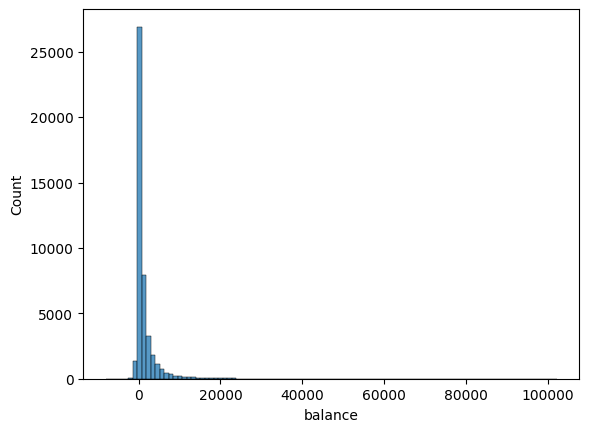

In [21]:
#Balance

sns.histplot(df["balance"] , bins = 100)
plt.show()

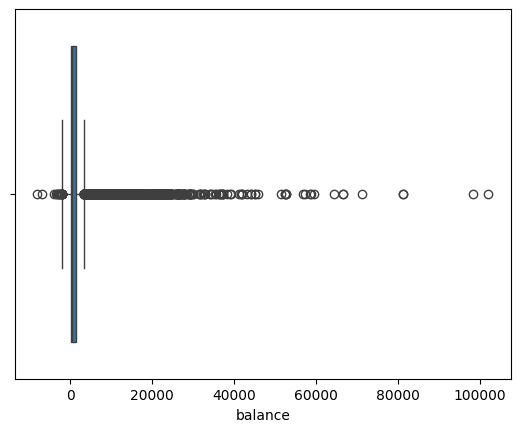

In [22]:
sns.boxplot(df["balance"] , orient = "h")
plt.show()

In [6]:
balance_data = df["balance"]

Q1 = np.percentile(balance_data, 25)
Q3 = np.percentile(balance_data, 75)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(Q1)
print(Q3)

print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

72.0
1428.0
Lower whisker: -1962.0
Upper whisker: 3462.0


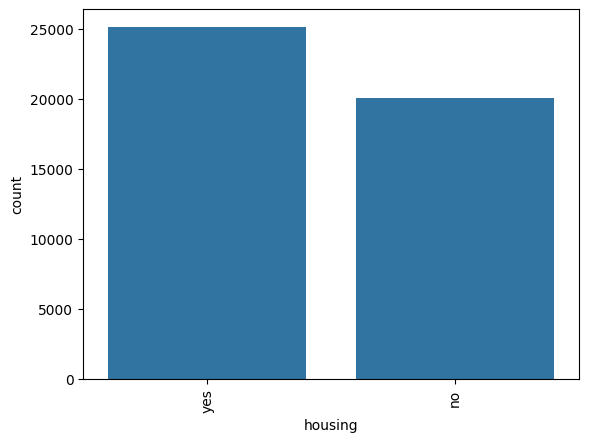

In [27]:
#Housing
sns.countplot(df , x = "housing")
plt.xticks(rotation = 90)
plt.show()

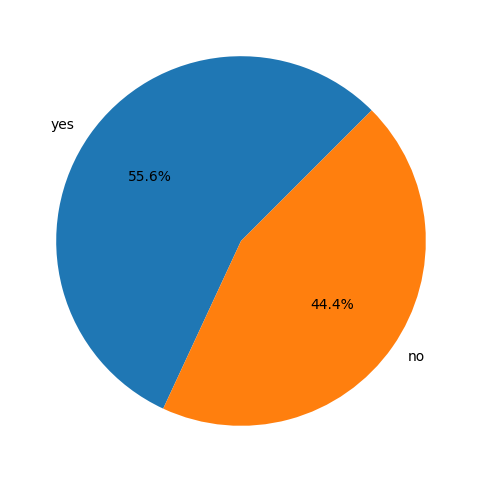

In [7]:
housing_counts = df['housing'].value_counts()
plt.figure(figsize = (6,6))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=45)
plt.show()

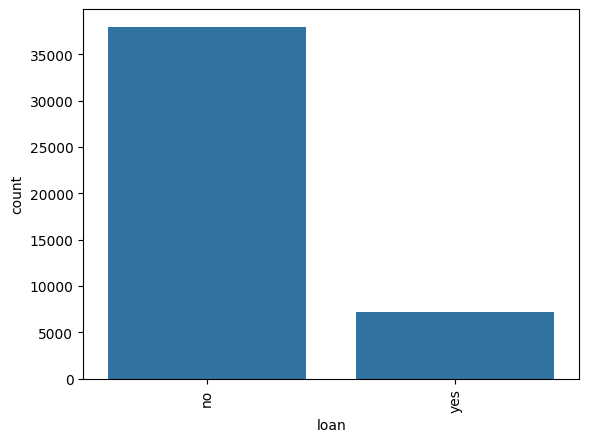

In [29]:
# Loan -> personal

sns.countplot(df , x = "loan")
plt.xticks(rotation = 90)
plt.show()

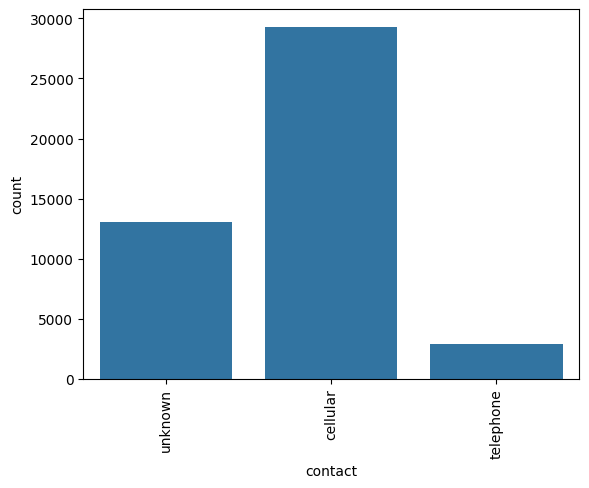

In [30]:
#Contact

sns.countplot(df , x = "contact")
plt.xticks(rotation = 90)
plt.show()

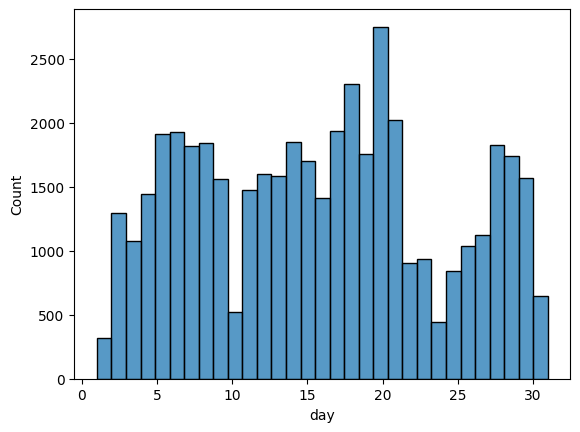

In [31]:
#Day
sns.histplot(df["day"] , bins = 31)
plt.show()

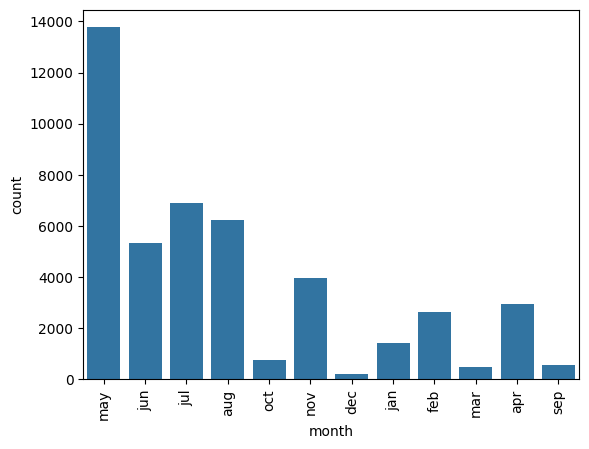

In [32]:
#Month

sns.countplot(df , x = "month")
plt.xticks(rotation = 90)
plt.show()

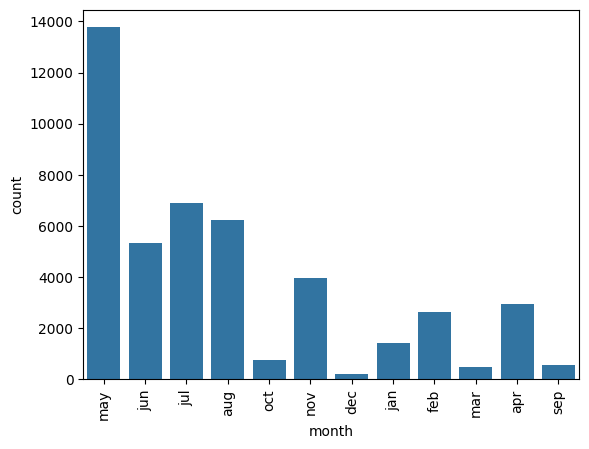

In [33]:
#Duration

sns.countplot(df , x = "month")
plt.xticks(rotation = 90)
plt.show()

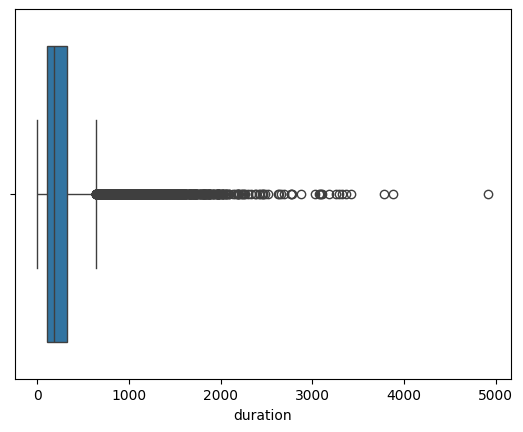

In [34]:
sns.boxplot(df["duration"] , orient = "h")
plt.show()

In [8]:
duration_data = df["duration"]

Q1 = np.percentile(duration_data, 25)
Q3 = np.percentile(duration_data, 75)

IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR

print("Upper whisker:", upper_whisker)

Upper whisker: 643.0


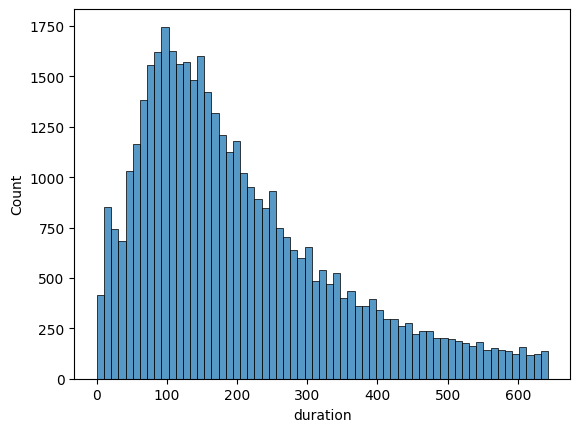

In [36]:
sns.histplot(df["duration"][df["duration"] <= 643])
plt.show()

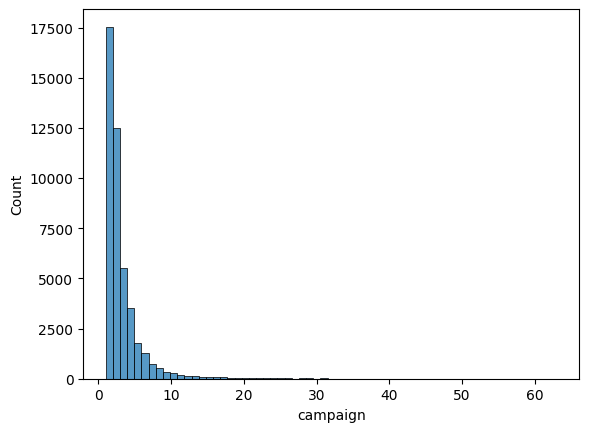

In [9]:
#Campaign
sns.histplot(df["campaign"] , bins = 63)
plt.show()

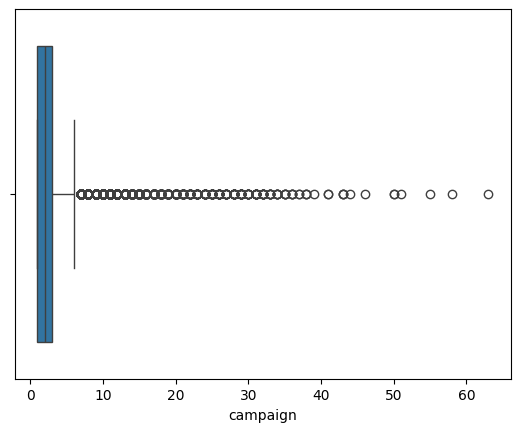

In [10]:
sns.boxplot(df["campaign"] , orient = "h")
plt.show()

In [11]:
duration_data = df["campaign"]

Q1 = np.percentile(duration_data, 25)
Q3 = np.percentile(duration_data, 75)

IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR

print("Upper whisker:", upper_whisker)

Upper whisker: 6.0


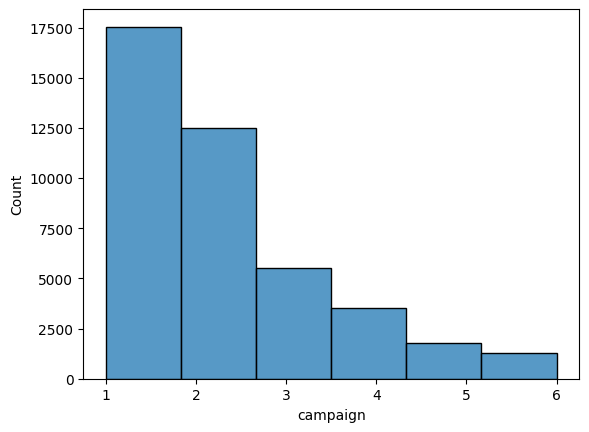

In [13]:
sns.histplot(df["campaign"][df["campaign"] <= 6] , bins=6)
plt.show()

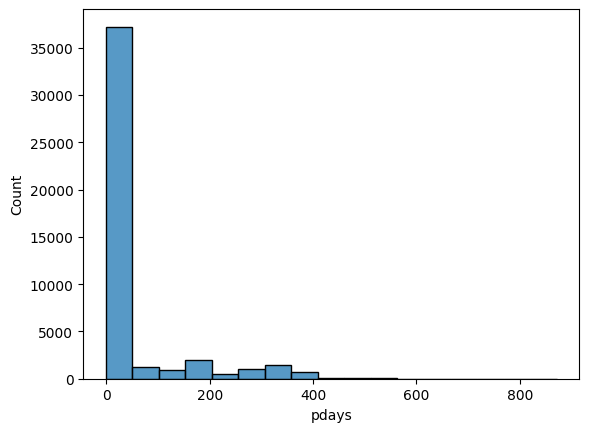

In [14]:
#pdays

sns.histplot(df["pdays"])
plt.show()

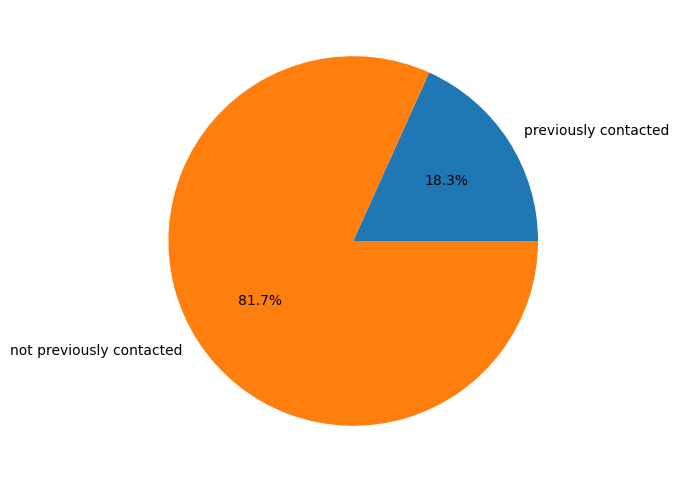

In [15]:
positive_pdays_count = df["pdays"][df["pdays"] > -1].count()
negative_pdays_count = df["pdays"][df["pdays"] == -1].count()

labels = ['previously contacted', "not previously contacted"]
counts = [positive_pdays_count, negative_pdays_count]

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

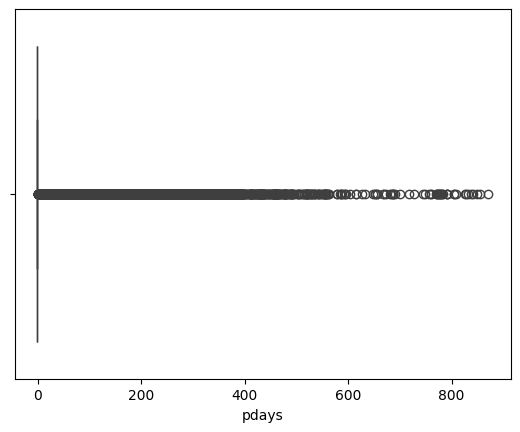

In [16]:
sns.boxplot(df["pdays"] , orient = "h")
plt.show()

In [17]:
pdays_data = df["pdays"]

Q1 = np.percentile(pdays_data, 25)
Q3 = np.percentile(pdays_data, 75)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Q1: -1.0
Q3: -1.0
IQR: 0.0
Lower whisker: -1.0
Upper whisker: -1.0


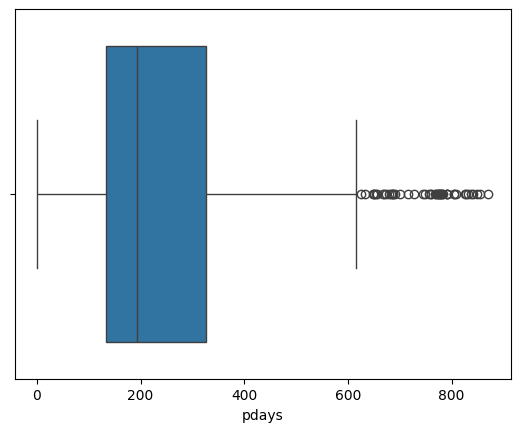

In [18]:
sns.boxplot(x = df["pdays"][df["pdays"] > -1] , orient="h") #41
plt.show()

In [19]:
new_pdays_data = df["pdays"][df["pdays"] > -1]

Q1 = np.percentile(new_pdays_data, 25)
Q3 = np.percentile(new_pdays_data, 75)

IQR = Q3 - Q1

upper_whisker = Q3 + 1.5 * IQR

print("Upper whisker:", upper_whisker)

Upper whisker: 618.0


In [ ]:
sns.histplot(df["pdays"][(df["pdays"] > -1) &(df["pdays"] <= 618 )] , bins = 619)
plt.show()